# Generate artificial data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
m = 100
X = 6* np.random.rand(m,1) - 3
y = 0.5 * X**2 + X +2 +np.random.randn(m,1)

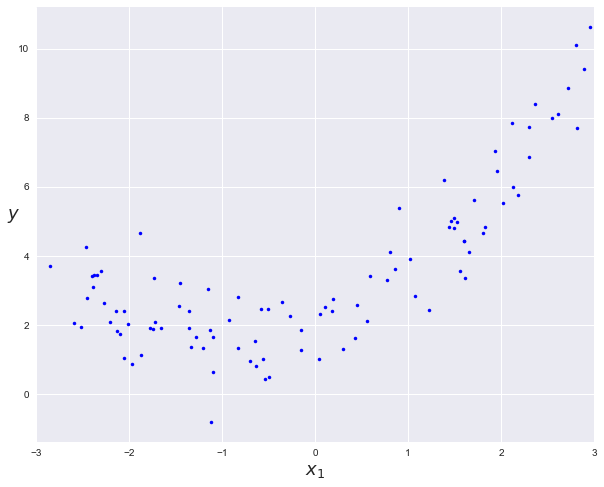

In [8]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(X,y,'b.')
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
ax.set_xlim(-3,3)
plt.show()

# Polynomial Regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [49]:
def construct_polynomial_pipeline(degree):
    polynomial_pipeline = Pipeline(
        (
            ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
            ("std_scaler", StandardScaler()),
            ('reg', LinearRegression())
        )
    )
    
    return polynomial_pipeline

In [50]:
poly_1_pipeline = construct_polynomial_pipeline(1)
poly_2_pipeline = construct_polynomial_pipeline(2)
poly_300_pipeline = construct_polynomial_pipeline(300)

In [51]:
poly_1_pipeline.fit(X,y)
poly_2_pipeline.fit(X,y)
poly_300_pipeline.fit(X,y)

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=300, include_bias=False, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))))

In [15]:
X_plot = np.arange(-3,3,0.1).reshape(-1,1)

In [52]:
y_1_pred = poly_1_pipeline.predict(X_plot)
y_2_pred = poly_2_pipeline.predict(X_plot)
y_300_pred = poly_300_pipeline.predict(X_plot)

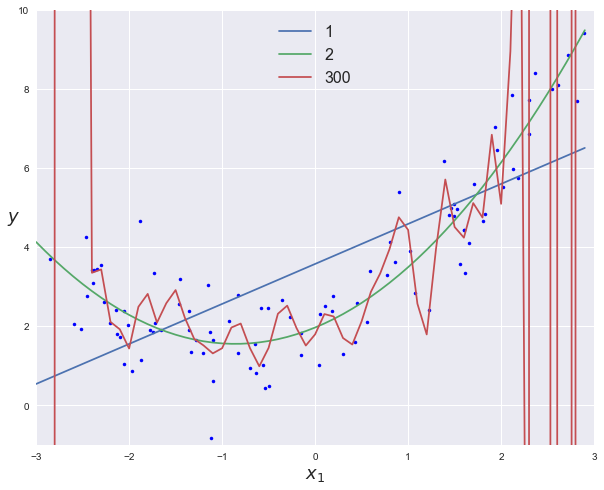

In [53]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(X,y,'b.')

ax.plot(X_plot,y_1_pred, label = '1')
ax.plot(X_plot,y_2_pred, label = '2')
ax.plot(X_plot,y_300_pred, label = '300')

ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)

ax.set_xlim(-3,3)
ax.set_ylim(-1,10)
ax.legend(loc="upper center", fontsize=16)

plt.show()

# Polynomial Ridge Regression

In [54]:
from sklearn.linear_model import Ridge

In [55]:
def construct_polynomial_ridge(degree, alpha):
    pipeline = Pipeline(
        (
            ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
            ("std_scaler", StandardScaler()),
            ('reg', Ridge(alpha, solver='cholesky'))
        )
    )
    
    return pipeline

In [56]:
poly_ridge_5_half = construct_polynomial_ridge(5,0.5)
poly_ridge_10_half = construct_polynomial_ridge(10,0.5)
poly_ridge_100_half = construct_polynomial_ridge(100,0.5)

poly_ridge_5_1 = construct_polynomial_ridge(5,1)
poly_ridge_10_1 = construct_polynomial_ridge(10,1)
poly_ridge_100_1 = construct_polynomial_ridge(100,1)

poly_ridge_5_20 = construct_polynomial_ridge(5,20)
poly_ridge_10_20 = construct_polynomial_ridge(10,20)
poly_ridge_100_20 = construct_polynomial_ridge(100,20)

In [57]:
poly_ridge_5_half.fit(X,y)
poly_ridge_10_half.fit(X,y)
poly_ridge_100_half.fit(X,y)

poly_ridge_5_1.fit(X,y)
poly_ridge_10_1.fit(X,y)
poly_ridge_100_1.fit(X,y)

poly_ridge_5_20.fit(X,y)
poly_ridge_10_20.fit(X,y)
poly_ridge_100_20.fit(X,y)

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=100, include_bias=False, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reg', Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001))))

In [58]:
y_5_half_plot = poly_ridge_5_half.predict(X_plot)
y_10_half_plot = poly_ridge_10_half.predict(X_plot)
y_100_half_plot= poly_ridge_100_half.predict(X_plot)

y_5_1_plot= poly_ridge_5_1.predict(X_plot)
y_10_1_plot = poly_ridge_10_1.predict(X_plot)
y_100_1_plot = poly_ridge_100_1.predict(X_plot)

y_5_20_plot = poly_ridge_5_20.predict(X_plot)
y_10_20_plot = poly_ridge_10_20.predict(X_plot)
y_100_20_plot = poly_ridge_100_20.predict(X_plot)

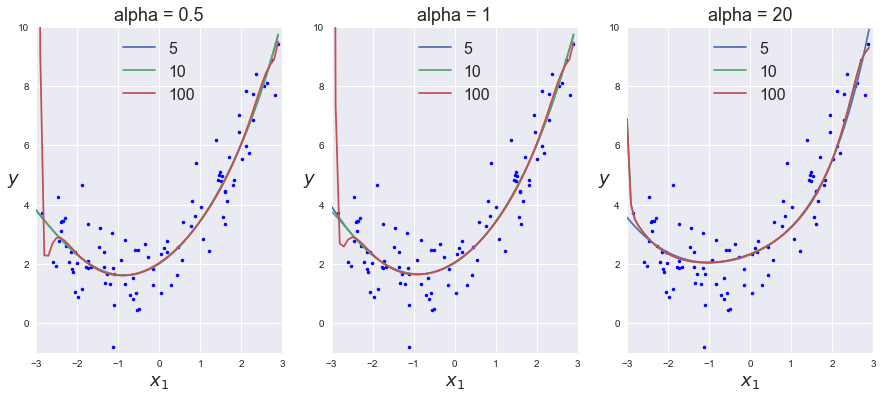

In [60]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15, 6))
ax1.plot(X,y,'b.')

ax1.plot(X_plot,y_5_half_plot, label = '5')
ax1.plot(X_plot,y_10_half_plot, label = '10')
ax1.plot(X_plot,y_100_half_plot, label = '100')

ax1.set_xlabel("$x_1$", fontsize=18)
ax1.set_ylabel("$y$", rotation=0, fontsize=18)

ax1.set_xlim(-3,3)
ax1.set_ylim(-1,10)
ax1.legend(loc="upper center", fontsize=16)
ax1.set_title('alpha = 0.5',fontsize=18)

ax2.plot(X,y,'b.')

ax2.plot(X_plot,y_5_1_plot, label = '5')
ax2.plot(X_plot,y_10_1_plot, label = '10')
ax2.plot(X_plot,y_100_1_plot, label = '100')

ax2.set_xlabel("$x_1$", fontsize=18)
ax2.set_ylabel("$y$", rotation=0, fontsize=18)

ax2.set_xlim(-3,3)
ax2.set_ylim(-1,10)
ax2.legend(loc="upper center", fontsize=16)
ax2.set_title('alpha = 1',fontsize=18)

ax3.plot(X,y,'b.')

ax3.plot(X_plot,y_5_20_plot, label = '5')
ax3.plot(X_plot,y_100_20_plot, label = '10')
ax3.plot(X_plot,y_100_20_plot, label = '100')

ax3.set_xlabel("$x_1$", fontsize=18)
ax3.set_ylabel("$y$", rotation=0, fontsize=18)

ax3.set_xlim(-3,3)
ax3.set_ylim(-1,10)
ax3.legend(loc="upper center", fontsize=16)
ax3.set_title('alpha = 20',fontsize=18)

plt.show()

# Learning curve based on Linear Regression and Polynomial Regression

In [61]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.metrics import mean_squared_error

In [63]:
linear_reg = LinearRegression()
poly_reg = construct_polynomial_pipeline(20)

In [85]:
def plot_learning_curves(model, X, y, ax):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    ax.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    ax.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    ax.legend(loc="upper right", fontsize=14)   # not shown in the book
    ax.set_xlabel("Training set size", fontsize=14) # not shown
    ax.set_ylabel("RMSE", fontsize=14)              # not shown
    ax.set_ylim(0,3)

In [110]:
def plot_fit(model, X,y,ax):
    model.fit(X,y)
    
    X_plot = np.arange(np.min(X), np.max(X), 0.1).reshape(-1,1)
    y_plot = model.predict(X_plot)
    
    ax.plot(X,y,'b.')
    ax.plot(X_plot,y_plot)
    
    ax.set_xlabel("$x_1$", fontsize=18)
    ax.set_ylabel("$y$", rotation=0, fontsize=18)

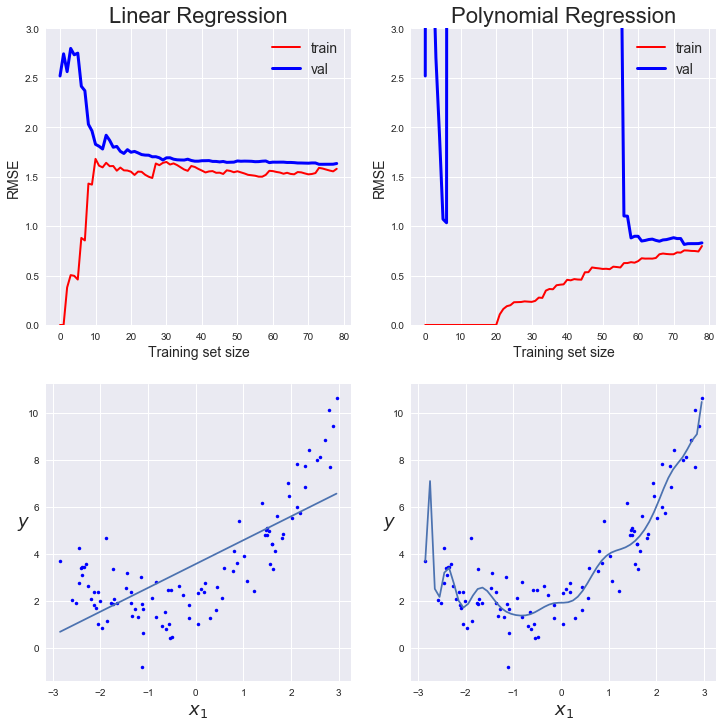

In [115]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (12,12))
plot_learning_curves(linear_reg, X,y, ax1)
plot_learning_curves(poly_reg, X, y, ax2)
plot_fit(linear_reg, X,y, ax3)
plot_fit(poly_reg, X, y, ax4)
ax1.set_title('Linear Regression',fontsize=22)
ax2.set_title('Polynomial Regression',fontsize=22)